# Homework 8: The Mean and the Normal Curve

Please complete this notebook by filling in the cells provided. When you’re done, follow the instructions in [this short explainer video](https://www.youtube.com/watch?v=gMt_Rq43y_4&ab_channel=FahadKamran) to submit your homework.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/fa16/weekly.html](http://data8.org/fa16/weekly.html).

This assignment is due Thursday, November 3 at 7PM. You will receive an early submission bonus point if you turn it in by Wednesday, November 2 at 7PM. Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

**Important note:** Only Parts 1 and 2 of this assignment will be graded.  Parts 3 and 4 of this assignment (on polling and landing spacecraft) will not be graded and are intended to give you extra practice.

Reading:
- Textbook chapter [12](https://www.inferentialthinking.com/chapters/12/why-the-mean-matters.html)

Run the cell below to prepare the notebook. There aren't any automated tests this time! Look for ways to check whether your answers are reasonable.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

/Users/chenshangheng/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/Users/chenshangheng/opt/anaconda3/lib/python3.8/site-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


## 1. Grouped Means


Suppose you'd like to know about the ages of the people in a small town.  The local government collects this data about everyone in the town, but to ensure that you don't see any individual's age, it only makes public the number of people of each age.  (This could have been done by calling `group` on the original data table.)  So the first few rows of the dataset look something like this:

|age|count|
|-|-|
|0|2|
|1|5|
|2|1|
|3|4|
|5|10|
|6|1|

That means there were 2 people age 0, 5 people age 1, etc.

#### Question 1
After you get the data, you first want to compute the mean age of the people in the town.

Write a function called `grouped_mean`.  It should take as its argument a table like the one above, except that the columns might have different names.  It should return the mean of the numbers in the dataset, assuming the first column contains the numbers themselves and the second column contains the count of each number, as in the example.

*Remember:* Even if you don't know the column name for the first column, you can access it by saying `tbl.column(0)`.

In [8]:
def grouped_mean(tbl):
    return sum(tbl.column(0) * tbl.column(1))/sum(tbl.column(1))

#### Question 2
Next, you want to summarize how spread out the ages are, so you decide to compute their standard deviation.

Write a function called `grouped_std`.  It should take as its argument a table like the one above, except that the columns might have different names.  It should return the standard deviation of the numbers in the dataset, assuming the first column contains the numbers and the second column contains the count of each number, as in the example.

*Hint:* You can think of the standard deviation as the square root of the mean of a dataset that's a transformed version of the original dataset.  The numbers in the transformed dataset are the squared deviations from the mean.  You've already written a function that computes means of grouped numbers, so that should be useful.

In [15]:
def grouped_std(tbl):
    # The staff answer took 3 lines and called grouped_mean twice.
    with_dev = Table().with_columns(
        "dev", (tbl.column(0) - grouped_mean(tbl))**2,
        "count", tbl.column(1)
    )
    return grouped_mean(with_dev)**0.5

<div class="hide">\pagebreak</div>
Maybe you aren't sure whether your code for the previous question is correct.  Testing your own code on simple cases is an important skill.  Let's practice that.

The built-in NumPy function `np.std` computes the standard deviation of an array of numbers.  It doesn't work for grouped data, so you couldn't have just used it in your answer to question 2!  But we can use it to check `grouped_std` by manually un-grouping some small datasets (duplicating each number once for each count, and putting the duplicated numbers into an array) and calling `np.std` on the result.

|age|count|
|-|-|
|10|1|
|15|2|

$$\longleftrightarrow$$

$$\verb|make_array(10, 15, 15)|$$

#### Question 3
For the two tables in the following **two** cells, create an array representing the original (un-grouped) dataset it came from, and then use it to verify that `grouped_std` computes the right answer on that table.  We've done most of the first one for you.

In [19]:
example_0 = Table().with_columns(
    "age", make_array(10, 15),
    "count", make_array(1, 2))
grouped_std_0 = grouped_std(example_0)
example_0_ungrouped = make_array(10, 15, 15)
# The standard deviation of example_0_ungrouped, according to NumPy:
numpy_std_0 = np.std(example_0_ungrouped)
print("NumPy answer:\t", numpy_std_0, "\nyour answer:\t", grouped_std_0)

NumPy answer:	 2.357022603955158 
your answer:	 2.357022603955158


In [20]:
example_1 = Table().with_columns(
    "age", make_array(10, 15, 20, 25),
    "count", make_array(1, 2, 3, 0))
# Fill in the rest of the test, as above, so that the last line
grouped_std_1 = grouped_std(example_1)
example_1_ungrouped = make_array(10, 15, 15, 20, 20, 20)
numpy_std_1 = np.std(example_1_ungrouped)
# prints out the results of the test.
print("NumPy answer:\t", numpy_std_1, "\nyour answer:\t", grouped_std_1)

NumPy answer:	 3.726779962499649 
your answer:	 3.72677996249965


<div class="hide">\pagebreak</div>
If your results are different, that means there's an error in your `grouped_std` function (or your `grouped_mean` function).  Go back and fix it!  Each time you make a change, you can rerun the tests you've written to see if you've gotten it right.

## 2. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by $$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ In other words, suppose we start with *any distribution* that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

**Question 1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement - is 10 large?  How about 50?  Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  he average of several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [22]:
def sample_size_n(n):
    coin = make_array(0, 1)
    sample_proportions = make_array()
    for i in np.arange(5000):
        # An array of the results of n coin flips (0s and 1s):
        flips = np.random.choice(coin, n)
        sample_proportion = np.count_nonzero(flips) / n
        sample_proportions = np.append(sample_proportion, sample_proportions)
    return sample_proportions


sample_size_n(5)

array([0.8, 0.2, 0.6, ..., 0.8, 0.4, 0.4])

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for several different sample sizes. The x- and y-scales are kept the same to facilitate comparisons.

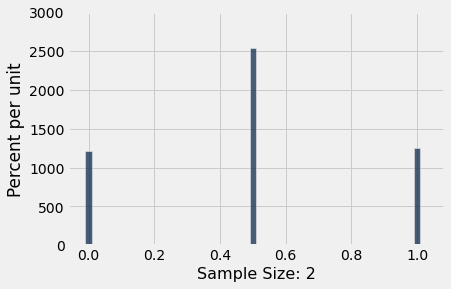

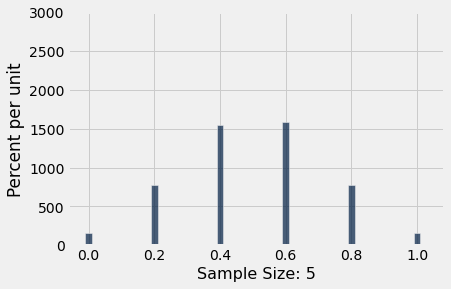

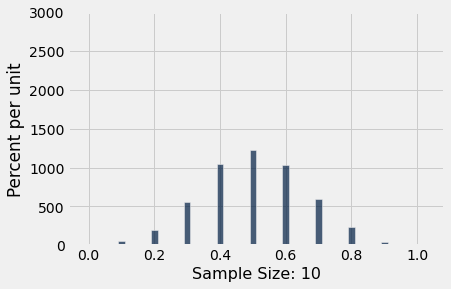

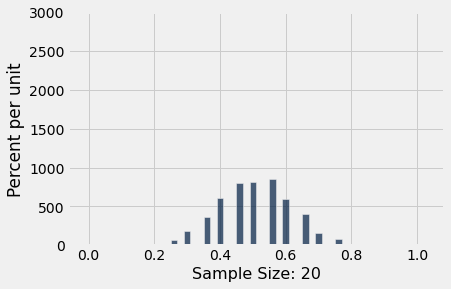

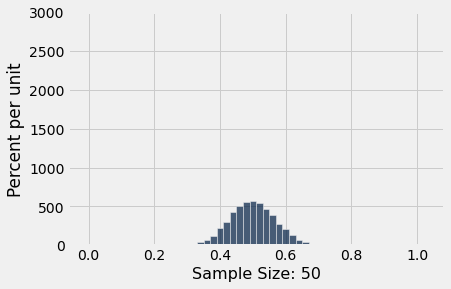

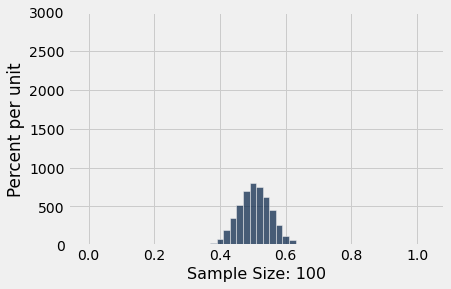

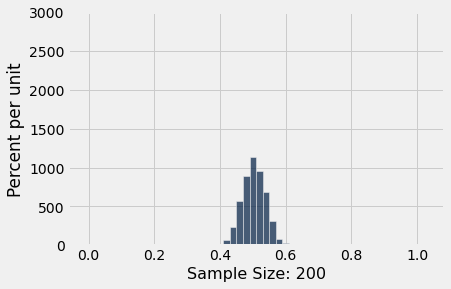

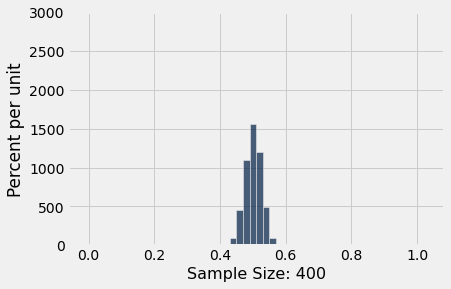

In [23]:
bins = np.arange(-0.01,1.05,0.02)

for sample_size in make_array(2, 5, 10, 20, 50, 100, 200, 400):
    Table().with_column('Sample Size: {}'.format(sample_size), sample_size_n(sample_size)).hist(bins=bins)
    plt.ylim(0, 30)

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

**Question 2:** In the plot for a sample size of 10, why are the bars spaced at intervals of .1, with gaps in between?

*Because the sample only have 10 possible results.*

**Question 3:** Among the histograms without gaps, what happens to the shapes of the histograms as the sample size goes up?

*The histograms become tight.*

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [24]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

**Question 4:** Write a function called `predict_sd`.  It takes a sample size `n` (a number) as its argument.  It returns the predicted standard deviation of the mean for samples of size `n` from the flight delays.

In [36]:
def predict_sd(n):
    return united_std / (n**0.5)
    
predict_sd(10)

12.484735400972708

**Question 5:** Write a function called `empirical_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples of size `n` from the flight delays dataset, and it should return the standard deviation of the 500 sample means.

*Hint:* This function will be similar to the `sample_size_n` function you wrote earlier.

In [37]:
def empirical_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n).column('Delay')
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_mean, sample_means)
    return np.std(sample_means)

empirical_sd(10)

13.131734148999513

<div class="hide">\pagebreak</div>
The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes.

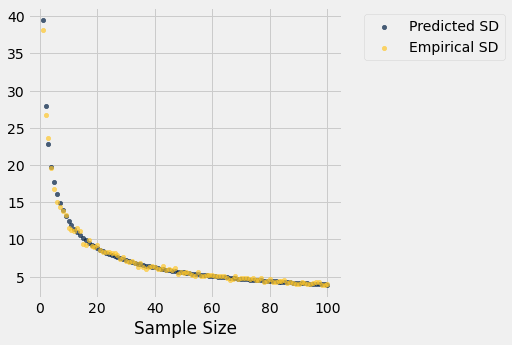

In [38]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')

**Question 6:** The empirical SDs are very close to the predicted SDs, but they're not exactly the same.  Why?

*The formula is just a predict, the real result can be vary.*

**Question 7:** As the sample size increases, do the SDs change in a way that's consistent with your answer to question 3?

*Yes.*

## 3. Polling and the Normal Distribution


Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal or vertical axes), called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition.

In [49]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))
sample_size = sum(sample.column("Count"))
sample_proportions = sample.with_column(
    "Proportion", sample.column("Count") / sample_size)
sample_proportions

She uses 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  Run the next cell to see the empirical distribution of Yes proportions in the 10,000 resamples.

In [50]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = proportions_from_distribution(sample_proportions, "Proportion", sample_size)
    resample_yes_proportions = np.append(resample_yes_proportions, resample.column("Random Sample").item(0))
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

<div class="hide">\pagebreak</div>
#### Question 1
Explain how the Central Limit Theorem applies to any distribution in this story.

*Write your answer here, replacing this text.*

<div class="hide">\pagebreak</div>
In a population whose members are 0 and 1, there is a simple formula for the standard deviation of that population:

$$\texttt{standard deviation} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

<div class="hide">\pagebreak</div>
#### Question 2
**Without accessing the data in `resample_yes_proportions` in any way**, and instead using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, compute a number that's approximately the standard deviation of the array `resample_yes_proportions`.

In [21]:
approximate_std = ...
approximate_std

<div class="hide">\pagebreak</div>
#### Question 3
Compute the standard deviation of the array `resample_yes_proportions` to verify that your answer to question 2 is approximately right.

In [51]:
exact_std = ...
exact_std

<div class="hide">\pagebreak</div>
#### Question 4
**Still without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.  The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

In [52]:
lower_limit = ...
upper_limit = ...

In [53]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

<div class="hide">\pagebreak</div>
Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 12 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

<div class="hide">\pagebreak</div>
#### Question 5
How did Michelle arrive at that answer?

*Write your answer here, replacing this text.*

## 4. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

In [65]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

In [64]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

<div class="hide">\pagebreak</div>
#### Question 1
Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** ...

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

<div class="hide">\pagebreak</div>
#### Question 2
What's a good test statistic?

**Test statistic:** ...

<div class="hide">\pagebreak</div>
#### Question 3
Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [61]:
def landing_test_statistic(x_coordinate, y_coordinate):
    ...

<div class="hide">\pagebreak</div>
#### Question 4
The cell below computes a P-value using your test statistic.  Describe the test procedure in words.  Is there a simulation involved?  If so, what is being simulated?

In [ ]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = make_array()
for i in np.arange(ordinary_landing_spots.num_rows):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats > test_stat) / len(null_stats)
p_value

*Write your answer here, replacing this text.*